In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import LogNorm

# ICE timeline 

In [216]:
# read in data
df = pd.read_csv("./monthly_bookins_citizenship.csv")

In [217]:
# convert months to number
num_months = []

for i in range(len(df)):
    if df["month"].iloc[i]=="1-Oct":
        num_months.append(10)
    elif df["month"].iloc[i]=="2-Nov":
        num_months.append(11)
    elif df["month"].iloc[i]=="6-Mar":
        num_months.append(3)
    elif df["month"].iloc[i]=="11-Aug":
        num_months.append(8)
    elif df["month"].iloc[i]=="8-May":
        num_months.append(5)
    elif df["month"].iloc[i]=="7-Apr":
        num_months.append(4)
    elif df["month"].iloc[i]=="9-Jun":
        num_months.append(6)
    elif df["month"].iloc[i]=="5-Feb":
        num_months.append(2)
    elif df["month"].iloc[i]=="12-Sep":
        num_months.append(9)
    elif df["month"].iloc[i]=="4-Jan":
        num_months.append(1)
    elif df["month"].iloc[i]=="10-Jul":
        num_months.append(7)
    elif df["month"].iloc[i]=="3-Dec":
        num_months.append(12)

df["num_month"] = num_months

In [218]:
# find most represented countried to visualize

pd.set_option('display.max_rows', None)
df.groupby("citizenship")["value"].sum().sort_values(ascending=False)

#Mexico                             2184680
#Guatemala                           801500
#Honduras                            609270
#El Salvador                         441860
#Nicaragua                           119080
#Colombia                            118910
#Ecuador                             116130

citizenship
Mexico                             2184680
Guatemala                           801500
Honduras                            609270
El Salvador                         441860
Nicaragua                           119080
Colombia                            118910
Ecuador                             116130
Cuba                                110680
Venezuela                           103910
Brazil                               82500
India                                70560
Dominican Republic                   64130
Haiti                                58150
Peru                                 53570
China, Peoples Republic Of           37520
Jamaica                              22420
Turkey                               18940
Russia                               17160
Bangladesh                           12730
Romania                              12460
Vietnam                               9680
Nigeria                               8540
Senegal                               8410

In [219]:
# create order of countries and months to visualize
countries = ["Mexico","Guatemala","Honduras","El Salvador","Nicaragua","Colombia","Ecuador"]
month_order = [10,11,12,1,2,3,4,5,6,7,8,9]

In [220]:
# create lists to plot

top_country_vals = []
# for the most represented countries
for i in range(len(countries)):

    curr_country = countries[i] # get current country
    curr_df = df[df["citizenship"]==curr_country] # mask for current country
    
    country_vals = [] # store vals for current country
    
    for j in range(2010,2025): # for each of the years
        curr_country_yr = curr_df[curr_df["fiscal_year"]==j]
        for k in month_order: # for each of the fiscal year months (Oct to Sept)
            curr_con_yr_month = curr_country_yr["value"][curr_country_yr["num_month"]==k].item()
            country_vals.append(curr_con_yr_month) # store the value 
    top_country_vals.append(country_vals)

# for the rest of the countries
curr_df = df[~df['citizenship'].isin(countries)] 

other_country_vals = [] # store the vals
for j in range(2010,2025):
    curr_country_yr = curr_df[curr_df["fiscal_year"]==j]
    for k in month_order:
        curr_con_yr_month = curr_country_yr["value"][curr_country_yr["num_month"]==k].sum().item()
        other_country_vals.append(curr_con_yr_month)
        

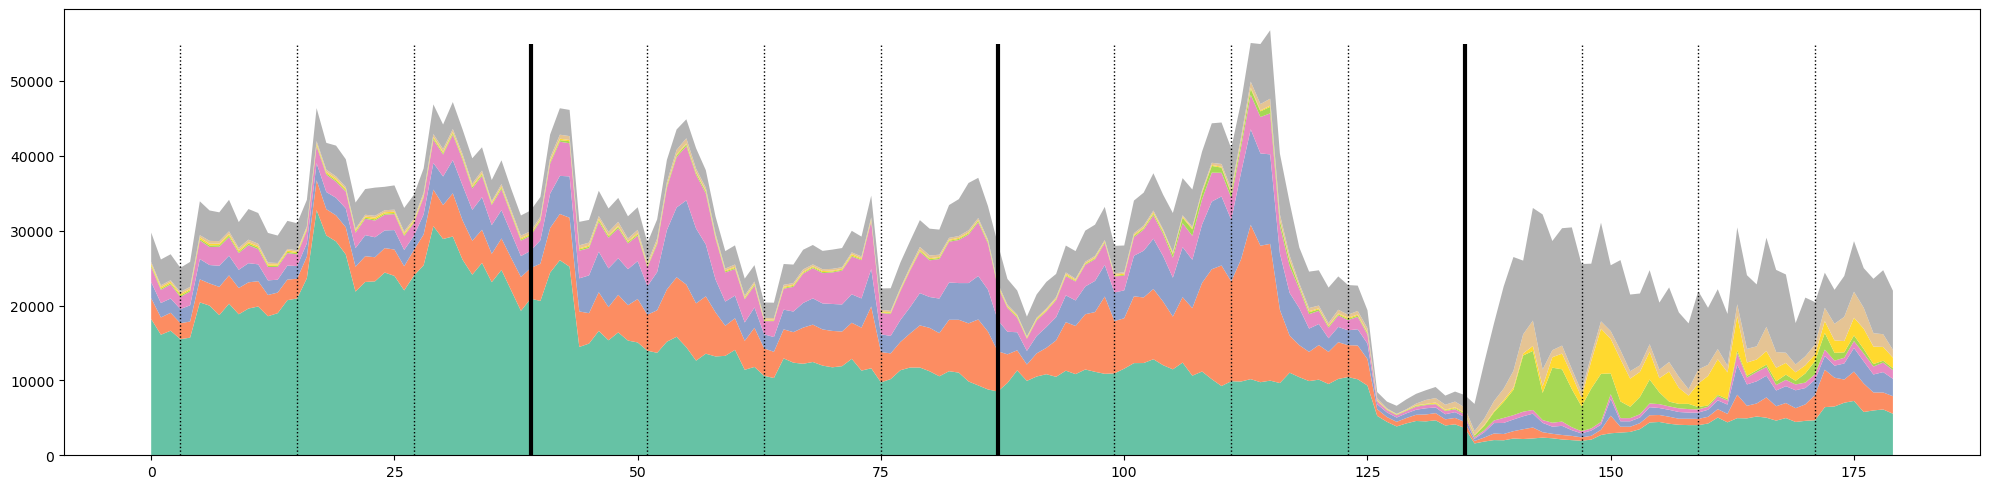

In [221]:
# plot

# get indices of year marks to plot

# 2009 obama 1
# 3 = 2010
# 15 = 2011
# 27 = 2012
# 39 = 2013 # obama 2
# 51 = 2014
# 63 = 2015
# 75 = 2016
# 87 = 2017 # trump 1
# 99 = 2018
# 111 = 2019
# 123 = 2020
# 135 = 2021 # biden
# 147 = 2022
# 159 = 2023
# 171 = 2024

plt.figure(figsize=(20,5))

xvals = np.arange(180)
colors1 = ["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f","#e5c494","#b3b3b3"]

plt.stackplot(xvals,
              top_country_vals[0],
              top_country_vals[1],
              top_country_vals[2],
              top_country_vals[3],
              top_country_vals[4],
              top_country_vals[5],
              top_country_vals[6],
              other_country_vals, 
              colors=colors1
             )

plt.vlines(x=[39,87,135], ymin=0, ymax=55000, color="k", lw=3) # administrations
plt.vlines(x=[3,15,27,51,63,75,99,111,123,147,159,171], ymin=0, ymax=55000, color="k", lw=1, linestyle="dotted") # years
plt.tight_layout()
plt.savefig("ICE_timeline.png")

# Maps of ICE detention

In [222]:
ice_countries = pd.read_csv("./country_ICE_detentions.csv")

In [223]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf = gpd.read_file(url)

gdf["SOVEREIGNT"].sort_values()

merged_df = pd.merge(gdf, ice_countries, on="SOVEREIGNT")

### By number

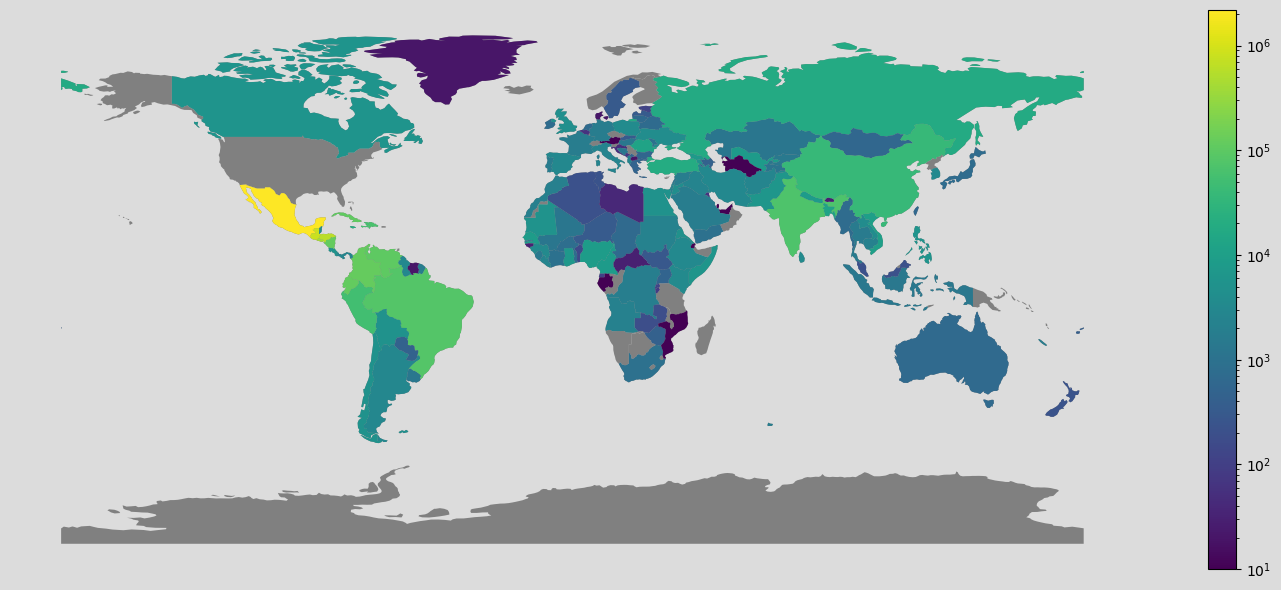

In [224]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor="gainsboro")

gdf.plot(ax=ax,color="gray")
merge_df.plot(ax=ax, column="ICE_detentions", legend=True,
              norm=LogNorm(vmin=merge_df["ICE_detentions"].min(), vmax=merge_df["ICE_detentions"].max())
             )
plt.axis("off")
plt.tight_layout()
plt.savefig("ICE_detention_map.png")

In [225]:
top20=ice_countries.sort_values(by="ICE_detentions", ascending=False).reset_index().iloc[0:20]

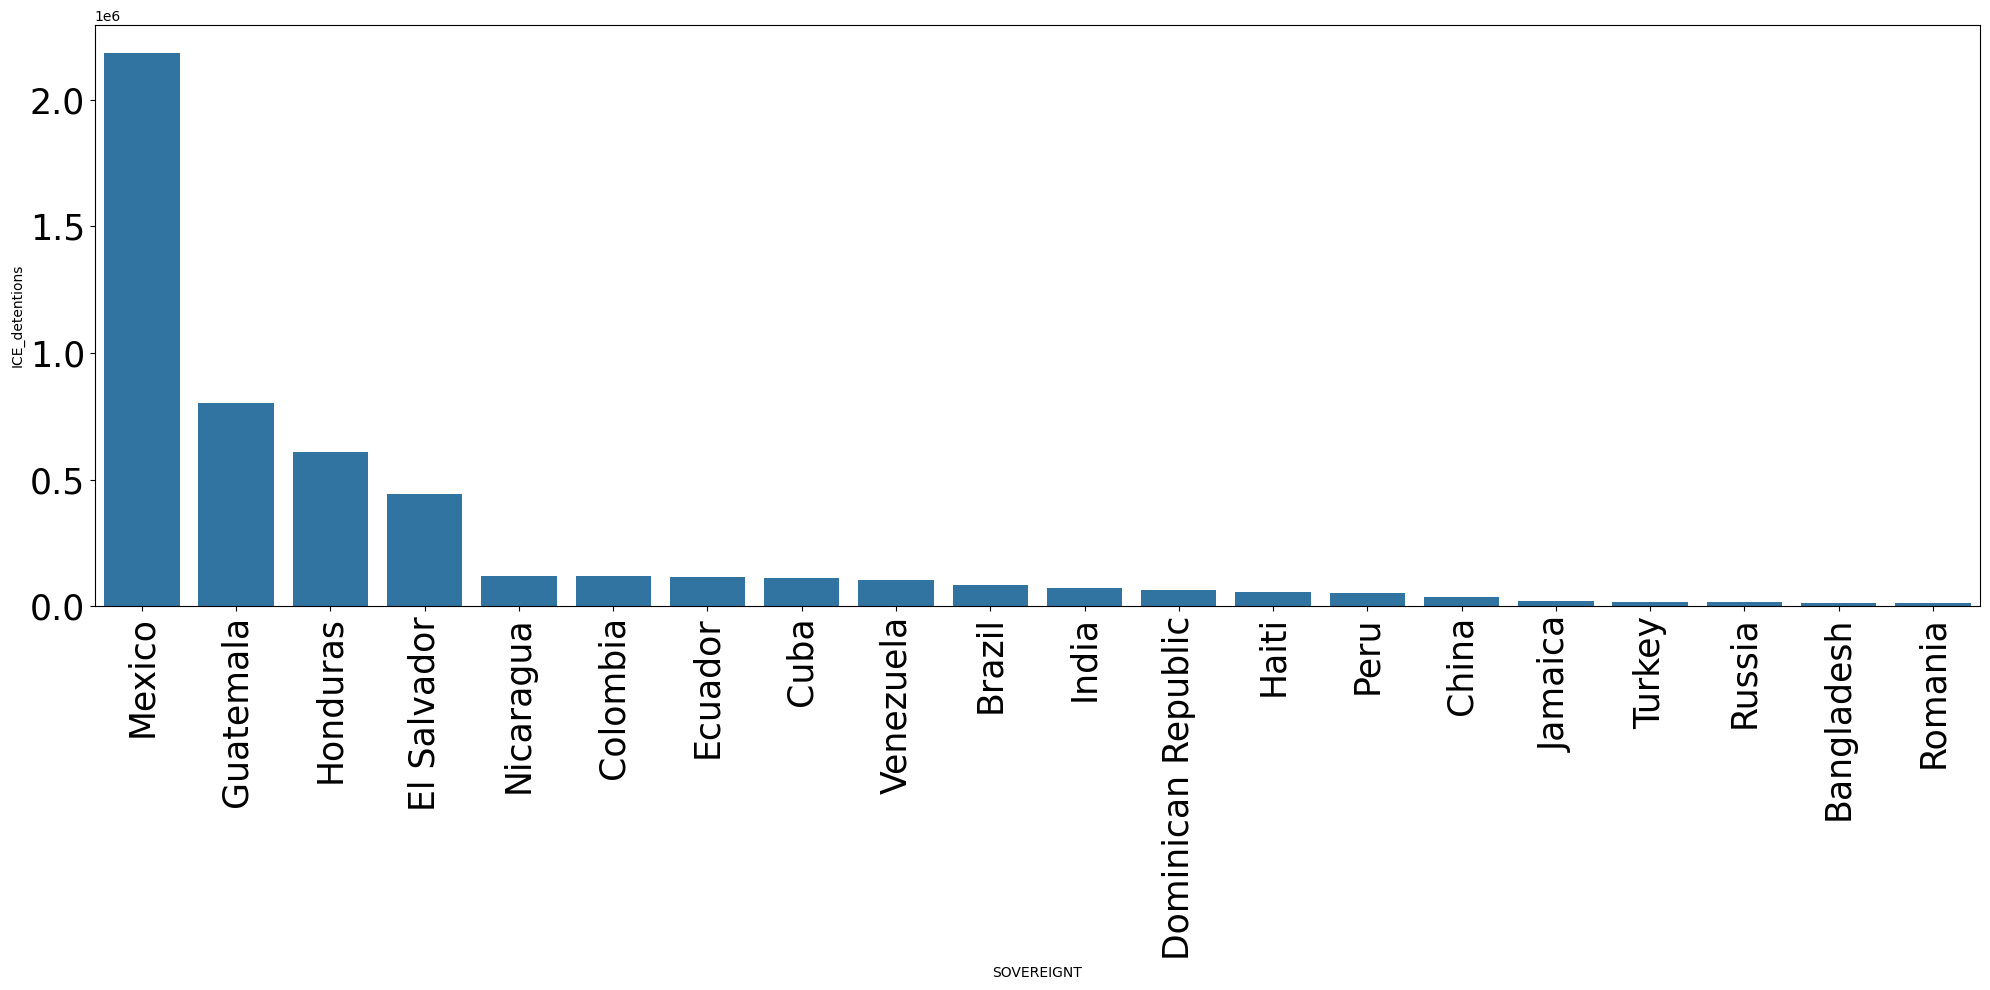

In [226]:
plt.figure(figsize=(20,10))
sns.barplot(top20, x="SOVEREIGNT", y="ICE_detentions")
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.savefig("ICE_detention_barplot.png")

### By percent

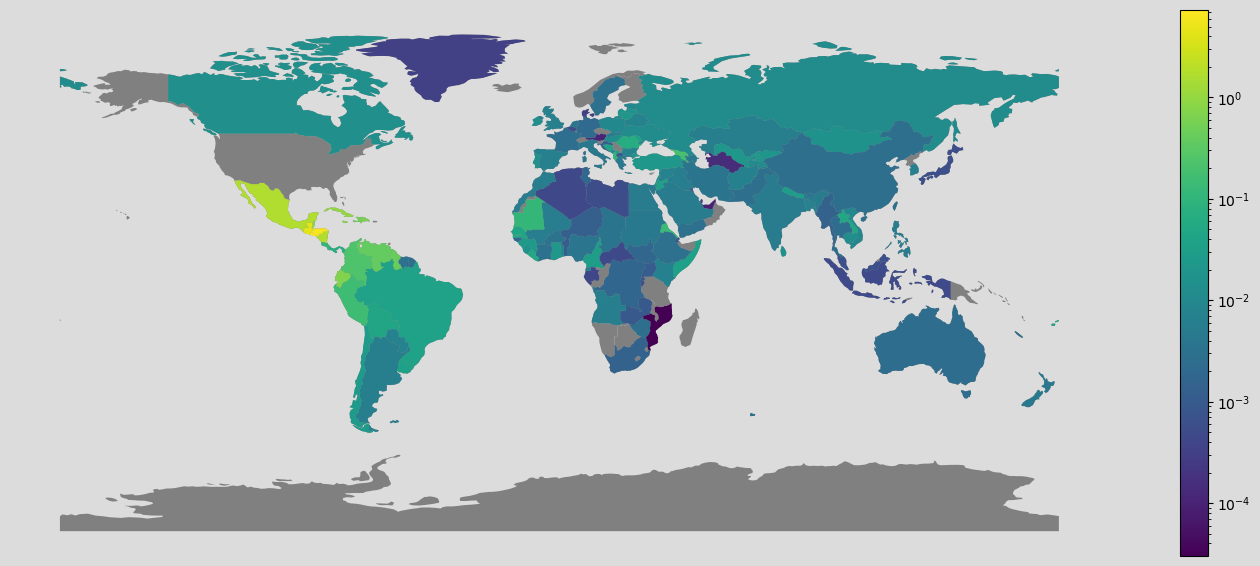

In [227]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor="gainsboro")

gdf.plot(ax=ax,color="gray")
merge_df.plot(ax=ax, column="percent", legend=True,
              norm=LogNorm(vmin=merge_df["percent"].min(), vmax=merge_df["percent"].max())
             )
plt.tight_layout()
plt.axis("off")
plt.savefig("ICE_percent_map.png")


In [228]:
top20=ice_countries.sort_values(by="percent", ascending=False).reset_index().iloc[0:20]

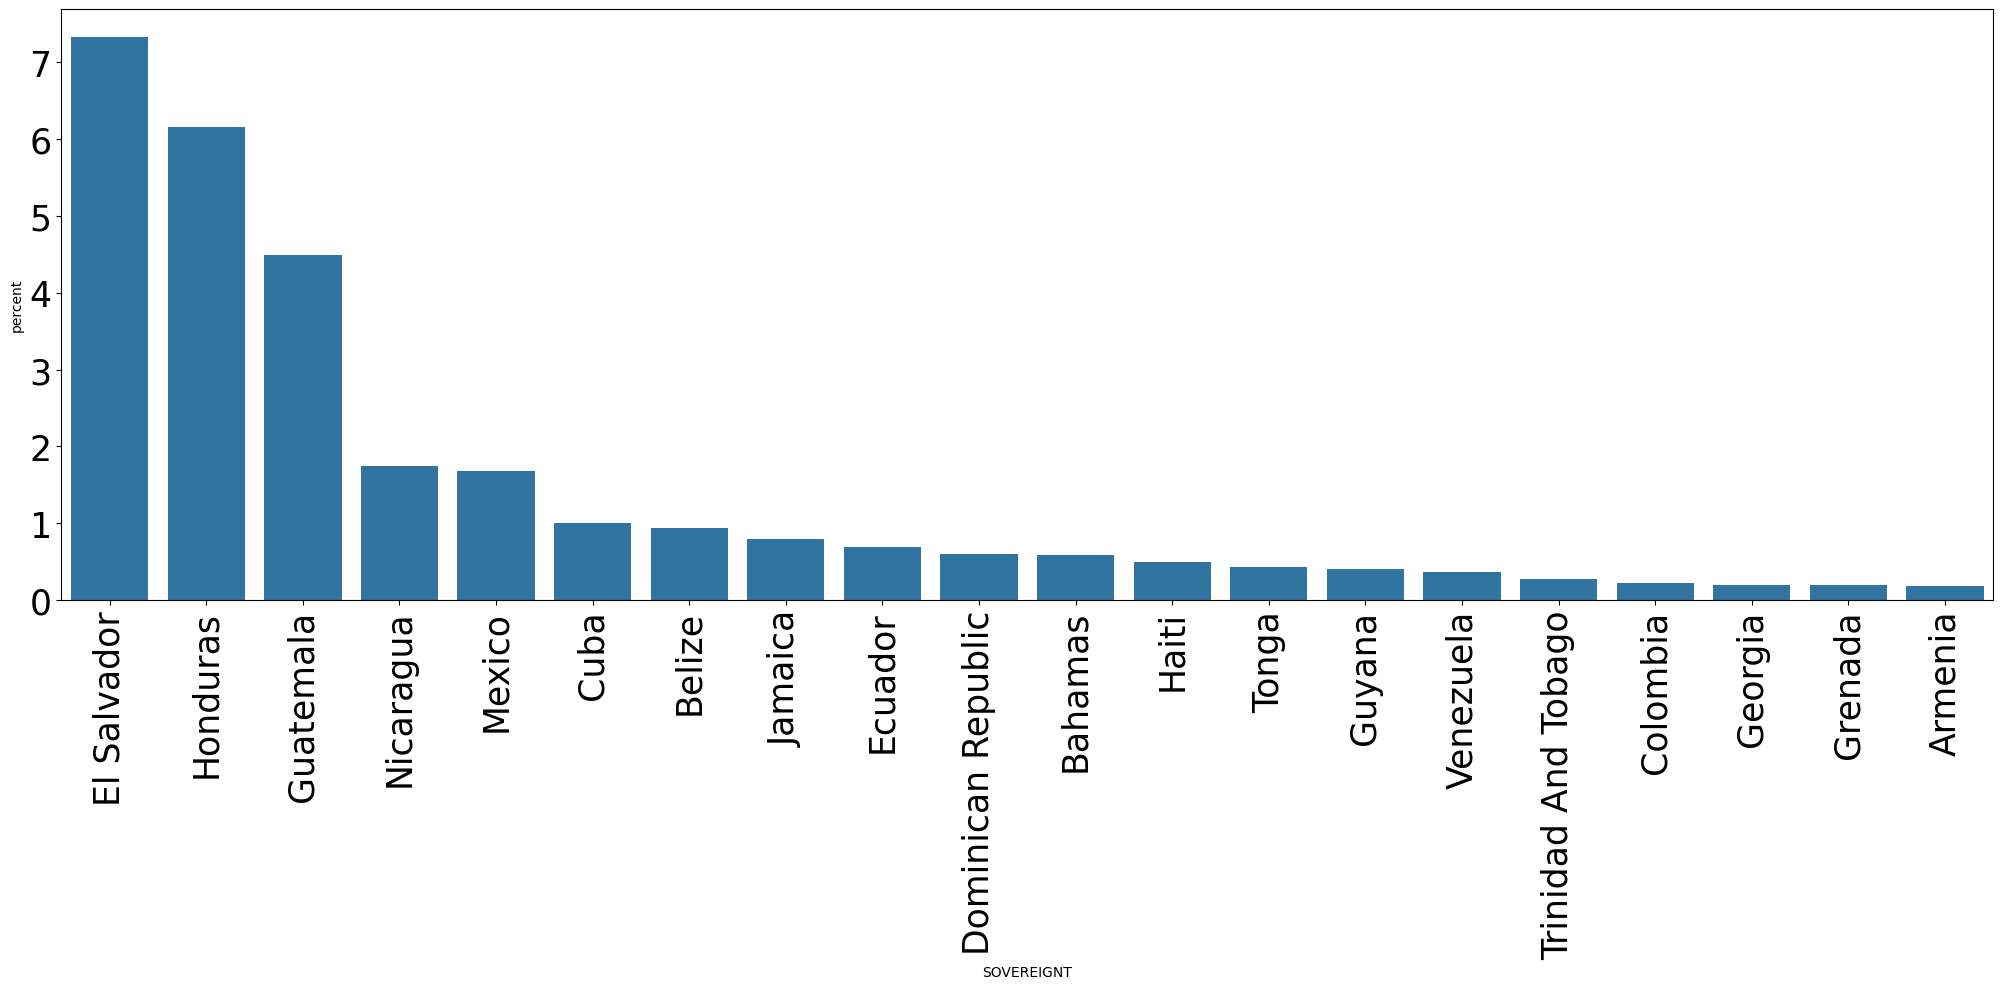

In [229]:
plt.figure(figsize=(20,10))
sns.barplot(top20, x="SOVEREIGNT", y="percent")
plt.xticks(rotation=90)
plt.xticks(rotation=90, fontsize=25)
plt.tight_layout()
plt.yticks(fontsize=25)
plt.savefig("ICE_percent_barplot.png")